In [8]:
import pandas as pd
import numpy as np
import yfinance as yf

In [9]:
# 1. Download historical data (last 1 year of daily data)
coffee_data = yf.download("KC=F", period="1y")
coffee_data.head()

/tmp/ipython-input-1523935418.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  coffee_data = yf.download("KC=F", period="1y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KC=F,KC=F,KC=F,KC=F,KC=F
Date,,,,,
2025-02-06,403.950012,411.250000,398.700012,402.000000,25382
2025-02-07,404.350006,413.950012,399.950012,403.250000,25608
2025-02-10,429.049988,431.950012,409.350006,410.450012,28480
2025-02-11,413.450012,437.950012,409.500000,433.850006,24827
2025-02-12,431.799988,432.899994,414.649994,416.000000,26179


In [10]:
coffee_data.to_csv('coffee_data.csv')
print("Data saved to coffee_data.csv")

Data saved to coffee_data.csv


**Cost of Carry Model**

**Project Overview**: Calculate the futures price for a coffee contract maturing in six months using the current spot price, the risk-free interest rate, and the estimated storage costs.


In [4]:
import numpy as np

# Given values
S_t = 2.94  # Spot price in dollars
r = 0.0358  # Risk-free rate (2%)
d = 0.01  # Storage cost (1%)
T = 0.5  # Time to maturity in years

# Calculating futures price
F_t = S_t * np.exp((r + d) * T)
print(f"The fair price of the coffee futures contract is ${F_t:.3f} per pound.")


The fair price of the coffee futures contract is $3.008 per pound.


**Black-Schole Model**

**Project Overview**: Price a call option on a coffee futures contract using the current spot price, strike price, risk-free rate, time to maturity, and volatility.

In [17]:
# loadiing the data

df = pd.read_csv('coffee_data.csv')
df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))
df = df[['Date', 'Close', 'log_returns']].dropna(subset=['log_returns'])

# calculating volatility
sigma = df['log_returns'].std() * np.sqrt(252)
print(f"The annualized volatility of the coffee futures contract is {sigma * 100:.2f}%.")


The annualized volatility of the coffee futures contract is 39.30%.


In [1]:

from scipy.stats import norm
import numpy as np

# Given values
S_0 = 2.94  # Spot price in dollars
X = 2.95  # Strike price in dollars
r = 0.0358  # Risk-free rate (3.58%)
T = 0.5  # Time to maturity in years
sigma = 0.3929  # Volatility (39.30%)

# Calculating d1 and d2
d1 = (np.log(S_0 / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculating call option price using Black-Scholes formula
C = S_0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
print(f"The price of the call option is ${C:.3f}.")


The price of the call option is $0.343.


**Monte Carlo Simulation**

**Project Overview**: Price a call option on a coffee futures contract using the current spot price, strike price, risk-free rate, time to maturity, and volatility.

In [3]:
import numpy as np

# Simulation parameters
S_0 = 2.94  # Spot price in dollars
r = 0.0358  # Risk-free rate (2%)
sigma = 0.3929  # Volatility (25%)
T = 0.5  # Time to maturity in years
num_simulations = 10000  # Number of simulations
num_steps = 252  # Number of steps (daily)

# Time increment
dt = T / num_steps

# Simulating price paths
np.random.seed(42)  # For reproducibility
price_paths = np.zeros((num_steps, num_simulations))
price_paths[0] = S_0
for t in range(1, num_steps):
    z = np.random.standard_normal(num_simulations)
    price_paths[t] = price_paths[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

# Calculating the average simulated price at maturity
average_simulated_price = np.mean(price_paths[-1])
print(f"The average simulated price of the coffee futures contract at maturity is ${average_simulated_price:.3f}.")

# 1. Final Prices at Maturity (The last row of the simulation)
final_prices = price_paths[-1]

# 3. Best Case (Maximum potential price)
best_case = np.max(final_prices)

# 4. Worst Case (Minimum potential price)
worst_case = np.min(final_prices)

# 5. In-The-Money (ITM) Probability
strike_price = 2.95
itm_count = np.sum(final_prices > strike_price)
itm_probability = (itm_count / num_simulations) * 100

# Output Results
print(f"--- Coffee Market Simulation Results ---")
print(f"Average Final Price: ${average_simulated_price:.3f}")
print(f"Best Case Scenario:  ${best_case:.3f}")
print(f"Worst Case Scenario: ${worst_case:.3f}")
print(f"ITM Probability:     {itm_probability:.2f}%")


The average simulated price of the coffee futures contract at maturity is $2.986.
--- Coffee Market Simulation Results ---
Average Final Price: $2.986
Best Case Scenario:  $7.843
Worst Case Scenario: $1.129
ITM Probability:     46.28%


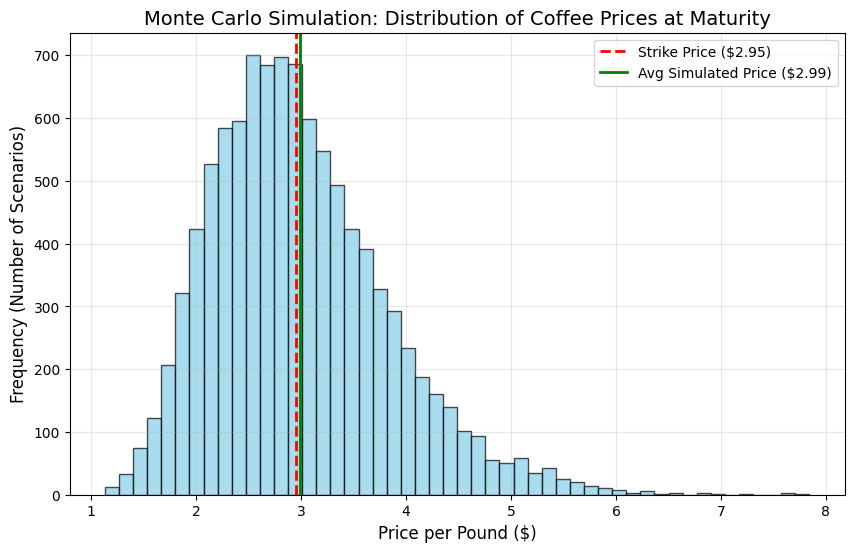

In [6]:
import matplotlib.pyplot as plt

# Create the Histogram Visualization ---
plt.figure(figsize=(10, 6))

# Plot the distribution of final prices
plt.hist(final_prices, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Add a vertical line for the STRIKE PRICE ($2.95)
plt.axvline(x=2.95, color='red', linestyle='--', linewidth=2, label='Strike Price ($2.95)')

# Add a vertical line for the AVERAGE SIMULATED PRICE
avg_price = np.mean(final_prices)
plt.axvline(x=avg_price, color='green', linestyle='-', linewidth=2, label=f'Avg Simulated Price (${avg_price:.2f})')

plt.title('Monte Carlo Simulation: Distribution of Coffee Prices at Maturity', fontsize=14)
plt.xlabel('Price per Pound ($)', fontsize=12)
plt.ylabel('Frequency (Number of Scenarios)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()